# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

# Loading the dataset

In [2]:
df = pd.read_csv('/content/updatedreeee.csv')

In [3]:
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7,John Smith,35,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5,Jane Doe,28,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7,David Lee,45,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14,Sarah Johnson,29,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7,Kim Nguyen,26,Female,Vietnamese,Airbnb,700,Train,200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Trip ID               137 non-null    int64 
 1   Destination           137 non-null    object
 2   Start date            137 non-null    object
 3   End date              137 non-null    object
 4   Duration (days)       137 non-null    int64 
 5   Traveler name         137 non-null    object
 6   Traveler age          137 non-null    int64 
 7   Traveler gender       137 non-null    object
 8   Traveler nationality  137 non-null    object
 9   Accommodation type    137 non-null    object
 10  Accommodation cost    137 non-null    object
 11  Transportation type   136 non-null    object
 12  Transportation cost   136 non-null    object
dtypes: int64(3), object(10)
memory usage: 14.0+ KB


In [5]:
df.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

In [6]:
df.nunique()

Trip ID                 137
Destination              45
Start date              111
End date                125
Duration (days)           9
Traveler name           109
Traveler age             29
Traveler gender           2
Traveler nationality     41
Accommodation type        8
Accommodation cost       53
Transportation type       9
Transportation cost      48
dtype: int64

In [7]:
df.drop(['Trip ID', 'Traveler name'], axis=1, inplace=True)

In [8]:

df.columns

Index(['Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler age', 'Traveler gender', 'Traveler nationality',
       'Accommodation type', 'Accommodation cost', 'Transportation type',
       'Transportation cost'],
      dtype='object')

# Spliting destination into city and country

In [9]:
df['Destination'].value_counts()

Paris, France                  14
Bali, Indonesia                12
Tokyo, Japan                   12
Rome, Italy                     9
New York, USA                   8
Sydney, Australia               8
Bangkok, Thailand               7
London, UK                      7
Barcelona, Spain                6
Rio de Janeiro, Brazil          5
Cancun, Mexico                  4
Cape Town, South Africa         3
Sydney, Aus                     3
Amsterdam, Netherlands          3
Vancouver, Canada               2
Seoul, South Korea              2
Phuket, Thailand                2
, Dubai                         2
New York City, USA              2
Bangkok, Thai                   1
Phuket, Thai                    1
Cape Town, SA                   1
, Canada                        1
Santorini, Greece               1
Los Angeles, USA                1
Phnom Penh, Cambodia            1
Sydney, AUS                     1
Athens, Greece                  1
, Australia                     1
, Spain       

In [10]:
df['Destination'].unique()

array(['London, UK', 'Phuket, Thailand', 'Bali, Indonesia',
       'New York, USA', 'Tokyo, Japan', 'Paris, France',
       'Sydney, Australia', 'Rio de Janeiro, Brazil',
       'Amsterdam, Netherlands', 'Dubai, United Arab Emirates',
       'Cancun, Mexico', 'Barcelona, Spain', 'Honolulu, Hawaii',
       'Berlin, Germany', 'Marrakech, Morocco', 'Edinburgh, Scotland',
       'Rome, Italy', 'Bangkok, Thailand', 'Hawaii, USA', ', Japan',
       ', Thailand', ', France', ', Australia', ', Brazil', ', Greece',
       ', Egypt', ', Mexico', ', Italy', ', Spain', ', Canada',
       'New York City, USA', 'Vancouver, Canada', 'Sydney, AUS',
       'Seoul, South Korea', 'Los Angeles, USA',
       'Cape Town, South Africa', 'Cape Town, SA', 'Sydney, Aus',
       'Bangkok, Thai', 'Phuket, Thai', ', Dubai', 'Santorini, Greece',
       'Phnom Penh, Cambodia', 'Athens, Greece', 'Auckland, New Zealand'],
      dtype=object)

## Creating the City and Country columns
If the Destination column has a single value then null is assigned to the city and that value is assigned to the Country Column

In [11]:
df[['City', 'Country']] = df['Destination'].str.split(',', expand=True)
df.loc[df['City'] == '', 'City'] = np.NaN
df.drop(columns = ['Destination'],inplace = True)

In [12]:
df['Country']=df['Country'].str.strip()

In [13]:
df[df['Country']=='Aus']

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
77,2/5/2024,2/12/2024,7,38,Male,Australian,Hotel,900 USD,Plane,600 USD,Sydney,Aus
117,5/1/2022,5/12/2022,11,26,Female,Chinese,Airbnb,800,Plane,1000,Sydney,Aus
123,11/11/2022,11/21/2022,10,30,Female,Chinese,Airbnb,900,Plane,1000,Sydney,Aus


In [14]:
df

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
0,5/1/2023,5/8/2023,7,35,Male,American,Hotel,1200,Flight,600,London,UK
1,6/15/2023,6/20/2023,5,28,Female,Canadian,Resort,800,Flight,500,Phuket,Thailand
2,7/1/2023,7/8/2023,7,45,Male,Korean,Villa,1000,Flight,700,Bali,Indonesia
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,New York,USA
4,9/10/2023,9/17/2023,7,26,Female,Vietnamese,Airbnb,700,Train,200,Tokyo,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...
132,8/1/2023,8/10/2023,9,37,Male,Brazilian,Hostel,2500,Car,2000,Rio de Janeiro,Brazil
133,8/15/2023,8/21/2023,6,29,Female,Canadian,Hotel,5000,Airplane,3000,Vancouver,Canada
134,9/1/2023,9/8/2023,7,34,Male,Chinese,Hostel,2000,Train,1000,Bangkok,Thailand
135,9/15/2023,9/22/2023,7,25,Female,Spanish,Airbnb,6000,Airplane,2500,Barcelona,Spain


In [15]:
df['Country'].nunique()

29

In [16]:
df['Country'].value_counts()

France                  15
Japan                   13
Indonesia               12
USA                     12
Italy                   10
Thailand                10
Australia                9
UK                       7
Spain                    7
Brazil                   6
Mexico                   5
Aus                      3
Netherlands              3
Greece                   3
Canada                   3
South Africa             3
South Korea              2
Dubai                    2
Thai                     2
Cambodia                 1
SA                       1
Morocco                  1
AUS                      1
Egypt                    1
Scotland                 1
Germany                  1
Hawaii                   1
United Arab Emirates     1
New Zealand              1
Name: Country, dtype: int64

# Handling the missing values in city column

In [17]:
capital = {
    'Egypt': 'Cairo',
    'Greece': 'Santorini'
}
def fill(df):
  """
  this function works on handling the missing value in the City column created from the destination column from the original dataset
  input parameter: dataframe
  return: returns dataframe that contains the filled value using mode
  """

  g = df.groupby('Country')['City'].agg(pd.Series.mode).reset_index()
  df['City'] = df['City'].fillna(df['Country'].map(g.set_index('Country')['City']))
  return df

df = fill(df)

In [19]:
df.iloc[[31]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
31,9/5/2022,9/14/2022,9,33,Female,Australian,Hostel,$150,Bus,$50,Rio de Janeiro,Brazil


In [20]:
df.loc[:32, 'City'] = 'Santorini'
df.loc[:33, 'City'] = 'Cairo'
df.loc[:88, 'Country'] = 'UAE'
df.loc[:88, 'City'] = 'Dubai'
df.loc[:113, 'City'] = 'Dubai'
df.loc[:113, 'Country'] = 'UAE'

In [21]:
df.iloc[[113]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
113,8/25/2022,8/30/2022,5,29,Female,United Arab Emirates,Hotel,1500,Car rental,300,Dubai,UAE


In [22]:
df

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
0,5/1/2023,5/8/2023,7,35,Male,American,Hotel,1200,Flight,600,Dubai,UAE
1,6/15/2023,6/20/2023,5,28,Female,Canadian,Resort,800,Flight,500,Dubai,UAE
2,7/1/2023,7/8/2023,7,45,Male,Korean,Villa,1000,Flight,700,Dubai,UAE
3,8/15/2023,8/29/2023,14,29,Female,British,Hotel,2000,Flight,1000,Dubai,UAE
4,9/10/2023,9/17/2023,7,26,Female,Vietnamese,Airbnb,700,Train,200,Dubai,UAE
...,...,...,...,...,...,...,...,...,...,...,...,...
132,8/1/2023,8/10/2023,9,37,Male,Brazilian,Hostel,2500,Car,2000,Rio de Janeiro,Brazil
133,8/15/2023,8/21/2023,6,29,Female,Canadian,Hotel,5000,Airplane,3000,Vancouver,Canada
134,9/1/2023,9/8/2023,7,34,Male,Chinese,Hostel,2000,Train,1000,Bangkok,Thailand
135,9/15/2023,9/22/2023,7,25,Female,Spanish,Airbnb,6000,Airplane,2500,Barcelona,Spain


In [23]:
df.iloc[[28]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
28,6/15/2022,6/22/2022,7,45,Male,Canadian,Hostel,$200,Train,$150,Dubai,UAE


# Replacing the values of Transportation type
## Airplane and Plane into **Flight**

In [24]:
def transportation_type(column):
  """
  function to make the uniform value in transportation type column
  input arguments:transportation type column
  return: the column with updated transportation type value
  """
  column.replace({"Plane": "Flight", "Airplane": "Flight"}, inplace=True)
  return column
df['Transportation type']=transportation_type(df['Transportation type'])

In [25]:
df.sample(10)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
59,7/15/2024,7/23/2024,8,33,Female,Italian,Airbnb,$800,Train,$100,Dubai,UAE
127,5/15/2023,5/22/2023,7,28,Female,British,Airbnb,7000,Train,1500,Tokyo,Japan
42,11/20/2022,11/27/2022,7,30,Female,Brazilian,Hotel,1200,Flight,700,Dubai,UAE
56,4/5/2024,4/13/2024,8,29,Female,Spanish,Airbnb,$700,Car rental,$250,Dubai,UAE
120,8/8/2022,8/16/2022,8,41,Male,American,Hotel,1300,Flight,600,Cancun,Mexico
52,12/24/2023,12/31/2023,7,28,Female,Canadian,Hotel,"$1,400",Flight,$800,Dubai,UAE
16,9/1/2023,9/10/2023,9,30,Female,American,Hotel,$900,Flight,$400,Dubai,UAE
74,6/7/2023,6/14/2023,7,46,Male,British,Hotel,1200 USD,Flight,700 USD,Dubai,UAE
124,12/24/2022,1/1/2023,8,28,Male,American,Hostel,400,Flight,700,Paris,France
45,9/15/2022,9/22/2022,7,41,Male,American,Hotel,1500,Flight,500,Dubai,UAE


In [26]:
df.iloc[[126]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
126,5/1/2023,5/7/2023,6,35,Male,American,Hotel,5000,Flight,2500,Paris,France


In [27]:
df.shape

(137, 12)

# Removing $ and USD from the cost column
## i.e. Transportation cost and Accommodation cost

In [28]:
def cost_col(column):
    """
    function to remove all $ and USD present in transportation and accommodation cost
    input parameter: transportation cost and accommodation cost column
    return: only numeric value removing all $ and USD
    """
    pattern = r'([^\d]+)'
    return column.str.replace(pattern, '')
    #return column.apply(lambda x: x.str.replace(pattern, ''))

df['Transportation cost']=cost_col(df['Transportation cost'])
df['Accommodation cost']=cost_col(df['Accommodation cost'])

<ipython-input-28-7b0ebd6f1016>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  return column.str.replace(pattern, '')


In [29]:
df.sample(10)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
12,6/10/2024,6/18/2024,8,29,Female,Chinese,Resort,3000,Flight,1200,Dubai,UAE
59,7/15/2024,7/23/2024,8,33,Female,Italian,Airbnb,800,Train,100,Dubai,UAE
130,7/1/2023,7/8/2023,7,42,Male,Korean,Airbnb,4000,Train,1500,Rome,Italy
120,8/8/2022,8/16/2022,8,41,Male,American,Hotel,1300,Flight,600,Cancun,Mexico
97,5/8/2023,5/14/2023,6,50,Male,China,Airbnb,800,Car rental,300,Dubai,UAE
10,4/1/2024,4/8/2024,7,27,Female,Mexican,Hotel,1000,Flight,500,Dubai,UAE
92,5/1/2022,5/10/2022,10,27,Female,Korean,Hotel,800,Train,150,Dubai,UAE
29,7/2/2022,7/11/2022,9,25,Male,Korean,Airbnb,600,Car rental,300,Dubai,UAE
22,11/1/2023,11/8/2023,7,29,Female,Italian,Airbnb,700,Train,80,Dubai,UAE
65,2/1/2024,2/8/2024,7,27,Male,American,Resort,2200,Flight,1000,Dubai,UAE


In [30]:
df.iloc[[57]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,City,Country
57,5/10/2024,5/18/2024,8,27,Male,South Korean,Hostel,500,Subway,20,Dubai,UAE


## Renaming the column

In [31]:
df.rename(columns = {'Transportation cost':'Transportation cost in dollar', 'Accommodation cost':'Accommodation cost in dollar'}, inplace = True)
df.sample(5)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
19,10/5/2023,10/15/2023,10,45,Male,Japanese,Hotel,1200,Flight,800,Dubai,UAE
105,9/1/2022,9/10/2022,9,28,Female,South Korea,Airbnb,800,Train,500,Dubai,UAE
74,6/7/2023,6/14/2023,7,46,Male,British,Hotel,1200,Flight,700,Dubai,UAE
97,5/8/2023,5/14/2023,6,50,Male,China,Airbnb,800,Car rental,300,Dubai,UAE
24,12/22/2023,12/28/2023,6,24,Female,Vietnamese,Hotel,1400,Train,100,Dubai,UAE


# Changing the irrelevant nationality value into appropriate ones in Traveler nationality column

In [32]:
df['Traveler nationality'].value_counts()

American                24
Korean                  13
British                 12
Canadian                 9
Australian               8
Spanish                  7
Chinese                  7
Italian                  4
Brazilian                4
Indian                   4
Vietnamese               3
South Korea              3
South Korean             3
Taiwan                   2
Canada                   2
USA                      2
South African            2
Japanese                 2
Mexican                  2
Emirati                  2
Dutch                    2
Brazil                   1
Cambodia                 1
United Arab Emirates     1
Greece                   1
Italy                    1
Singapore                1
United Kingdom           1
Hong Kong                1
Germany                  1
Japan                    1
Spain                    1
Scottish                 1
China                    1
UK                       1
German                   1
Indonesian               1
T

In [33]:
def nationality(col):
    """
    function to make uniform values for nationality
    input parameter: Traveler nationality column
    Return: Uniformed values for nationality in traveler nationality column
    """
    col = col.replace(['Canada', 'UK', 'USA', 'South Korea', 'Spain' 'South Korean', 'United Kingdom', 'Hong Kong', 'Italy', 'China', 'Taiwan', 'Japan', 'United Arab Emirates', 'Brazil', 'Greece', 'Singapore', 'Germany'],
     ['Canadian', 'British','American', 'Korean', 'Spanish' 'Korean', 'British', 'Chinese', 'Italian', 'Chinese', 'Taiwanese', 'Japanese', 'Emirati', 'Brazilian', 'Greek', 'Singaporean', 'German'])
    return col

df['Traveler nationality'] = nationality(df['Traveler nationality'])

In [34]:
df.iloc[[103]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
103,10/10/2024,10/17/2024,7,41,Male,German,Hotel,600,Train,150,Dubai,UAE


# Making the country names uniform in Country column

In [35]:
df['Country'].value_counts()

UAE             114
Japan             3
France            3
Aus               2
Italy             2
Indonesia         2
USA               1
Spain             1
Thailand          1
Canada            1
Brazil            1
Greece            1
Australia         1
South Africa      1
Cambodia          1
Mexico            1
New Zealand       1
Name: Country, dtype: int64

In [36]:
df.loc[df['Country']=='Thai','Country']='Thailand'
df.loc[df['Country']=='SA','Country']='South Africa'
df.loc[(df['Country']=='Aus')|(df['Country']=='AUS'),'Country']='Australia'
df.iloc[[80]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
80,1/1/2025,1/8/2025,7,32,Female,British,Resort,700,Flight,800,Dubai,UAE


In [37]:
df.iloc[[75]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
75,9/1/2023,9/10/2023,9,31,Male,South African,Guesthouse,400,Car,300,Dubai,UAE


In [38]:
df.iloc[[117]]

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country
117,5/1/2022,5/12/2022,11,26,Female,Chinese,Airbnb,800,Flight,1000,Sydney,Australia


# Date and time

In [39]:
df[['Start date','End date']]=df[['Start date','End date']].apply(pd.to_datetime)
df['Day of the week']=df['Start date'].dt.day_name()
df['Month']=df['Start date'].dt.month_name()

In [40]:
df.sample(5)

,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost in dollar,Transportation type,Transportation cost in dollar,City,Country,Day of the week,Month
37,2023-04-19,2023-04-26,7,38,Female,Australian,Airbnb,350,Bus,75,Dubai,UAE,Wednesday,April
101,2024-04-03,2024-04-10,7,33,Male,Brazilian,Hotel,900,Car rental,400,Dubai,UAE,Wednesday,April
18,2023-07-22,2023-07-28,6,35,Female,British,Hotel,1200,Train,150,Dubai,UAE,Saturday,July
116,2022-03-15,2022-03-22,7,47,Male,Canadian,Hotel,1200,Train,500,Paris,France,Tuesday,March
62,2023-01-07,2023-01-16,9,29,Female,British,Vacation rental,800,Car rental,200,Dubai,UAE,Saturday,January


# Visualization


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualization of Accommodation type

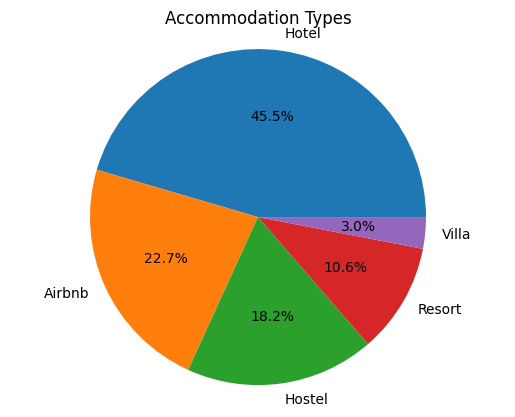

In [42]:
accomodations_counts = df['Accommodation type'].value_counts()[:5]

labels = accomodations_counts.index.tolist()
sizes = accomodations_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Accommodation Types')
plt.show()

### Visualization of transportation type

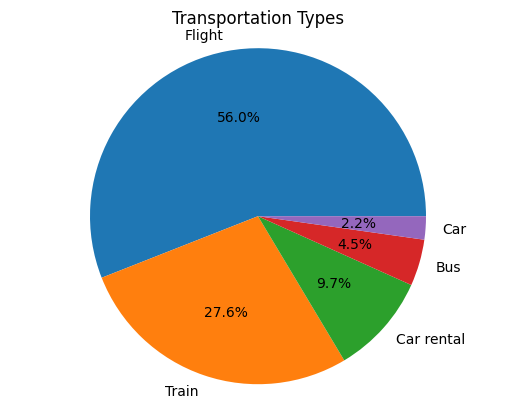

In [43]:
accomodations_counts = df['Transportation type'].value_counts()[:5]

labels = accomodations_counts.index.tolist()
sizes = accomodations_counts.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Transportation Types')
plt.show()

### plot showing count of traveler according to their age

Text(0.5, 1.0, 'Traveler age Distribution')

<Figure size 600x400 with 0 Axes>

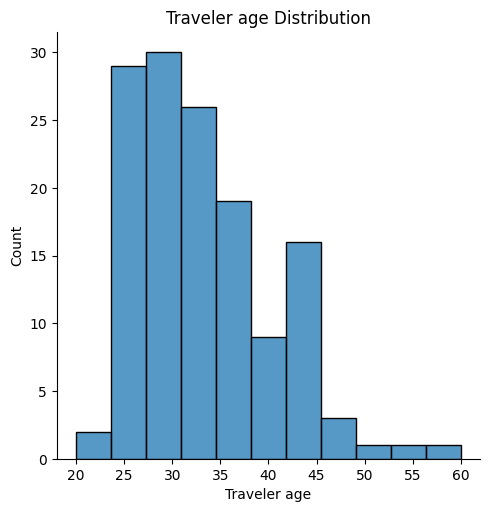

In [44]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Traveler age'])
plt.xlabel('Traveler age')
plt.title('Traveler age Distribution')


### Plot showing count of Nationality

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'American'),
  Text(1, 0, 'Canadian'),
  Text(2, 0, 'Korean'),
  Text(3, 0, 'British'),
  Text(4, 0, 'Vietnamese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Brazilian'),
  Text(7, 0, 'Dutch'),
  Text(8, 0, 'Emirati'),
  Text(9, 0, 'Mexican'),
  Text(10, 0, 'Spanish'),
  Text(11, 0, 'Chinese'),
  Text(12, 0, 'German'),
  Text(13, 0, 'Moroccan'),
  Text(14, 0, 'Scottish'),
  Text(15, 0, 'Japanese'),
  Text(16, 0, 'Italian'),
  Text(17, 0, 'Indian'),
  Text(18, 0, 'South Korean'),
  Text(19, 0, 'French'),
  Text(20, 0, 'South African'),
  Text(21, 0, 'Taiwanese'),
  Text(22, 0, 'Indonesian'),
  Text(23, 0, 'Spain'),
  Text(24, 0, 'Singaporean'),
  Text(25, 0, 'Greek'),
  Text(26, 0, 'Cambodia'),
  Text(27, 0, 'New Zealander')])

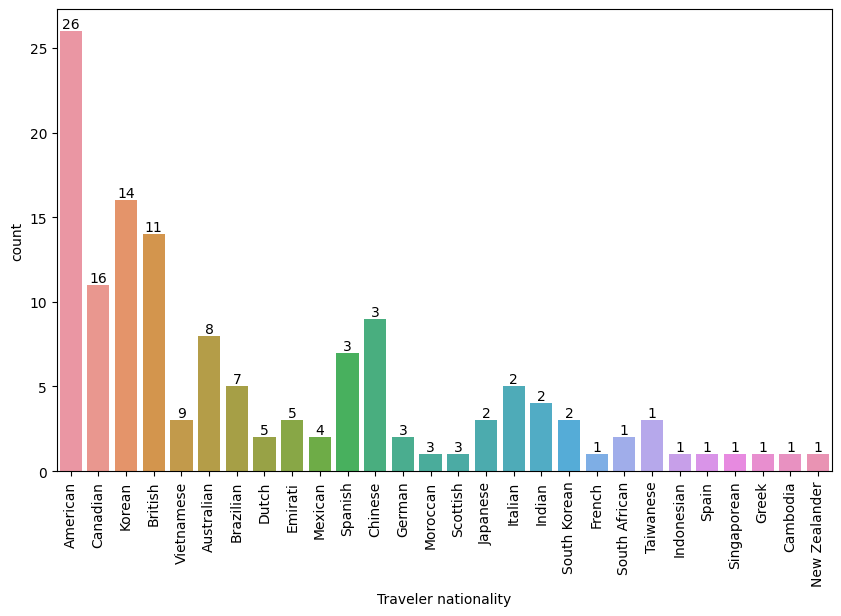

In [45]:
plt.figure(figsize=(10,6), dpi=100)
ax=sns.countplot(data=df, x="Traveler nationality")
abs_values = df['Traveler nationality'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)

### Count for transportation type

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flight'),
  Text(1, 0, 'Train'),
  Text(2, 0, 'Bus'),
  Text(3, 0, 'Car rental'),
  Text(4, 0, 'Subway'),
  Text(5, 0, 'Car'),
  Text(6, 0, 'Ferry')])

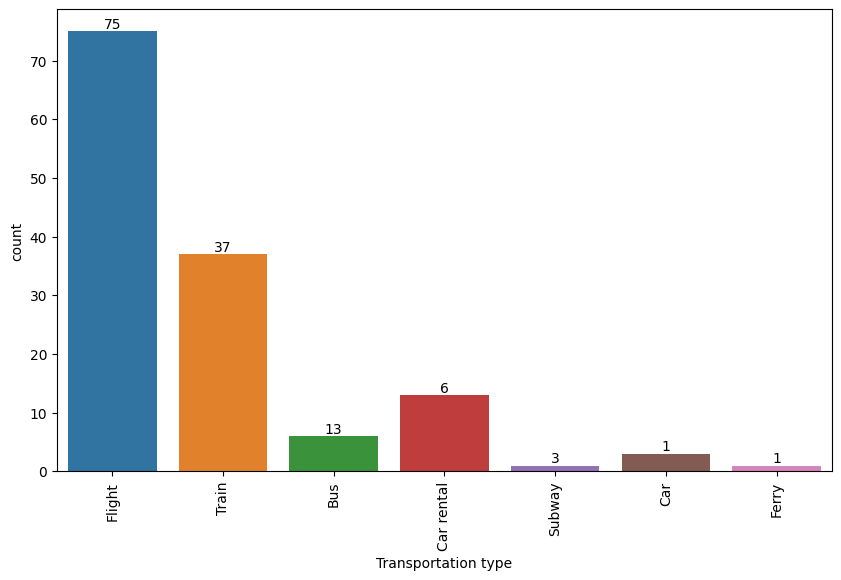

In [46]:
plt.figure(figsize=(10,6), dpi=100)
ax=sns.countplot(data=df, x="Transportation type")
values = df['Transportation type'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)
plt.xticks(rotation=90)

### Visualizing number of trips count by certain age group

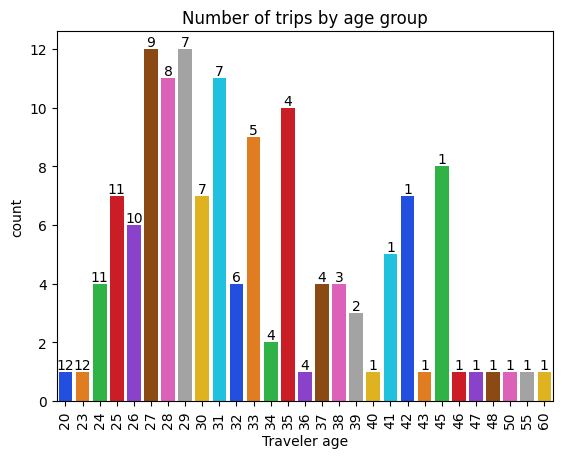

In [47]:
ax=sns.countplot(data=df,x=df['Traveler age'],palette = 'bright')
values = df['Traveler age'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title('Number of trips by age group')
plt.xticks(rotation=90)
plt.show()

### Most traveled duration

In [48]:
duractions_count = df['Duration (days)'].value_counts().idxmax()

print('Most common travel duration is', duractions_count, 'days.')

Most common travel duration is 7 days.


### bar plot showing top visited country

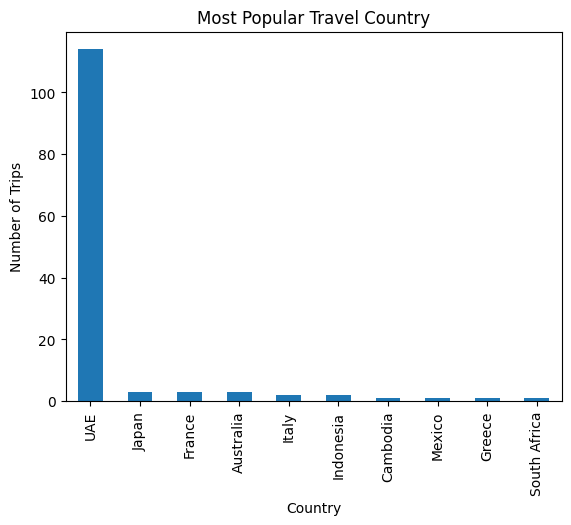

In [49]:
popular_destinations = df['Country'].value_counts()[:10]

popular_destinations.plot.bar()

plt.title('Most Popular Travel Country')
plt.xlabel('Country')
plt.ylabel('Number of Trips')

plt.show()

### top 10 country

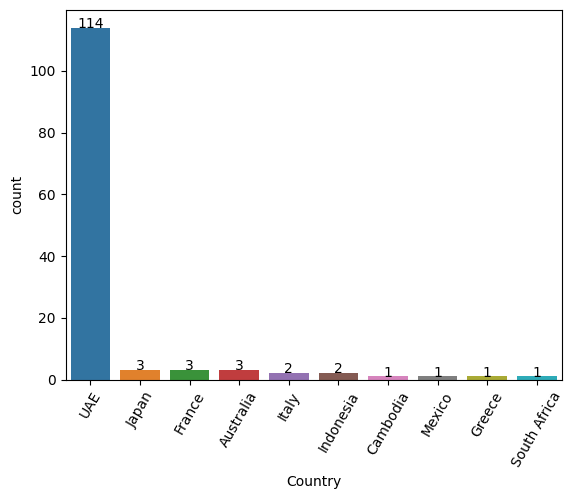

In [50]:
top10_country = df.Country.value_counts().reset_index().rename(columns={'index':'Country','Country':'count'}).head(10)
g = sns.barplot(data=top10_country,x='Country',y='count')
for v in top10_country.itertuples():
  g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.show()

### Most popular City

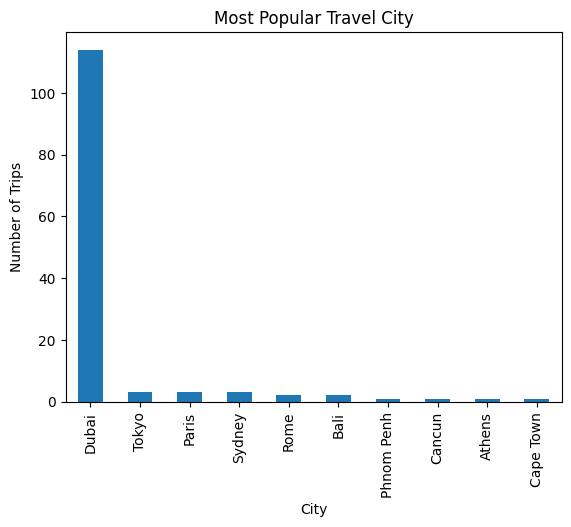

In [51]:
popular_cities = df['City'].value_counts()[:10]

popular_cities.plot.bar()

plt.title('Most Popular Travel City')
plt.xlabel('City')
plt.ylabel('Number of Trips')

plt.show()

### visualizing most prefered months

Text(0.5, 1.0, 'Most preferred months to Travel')

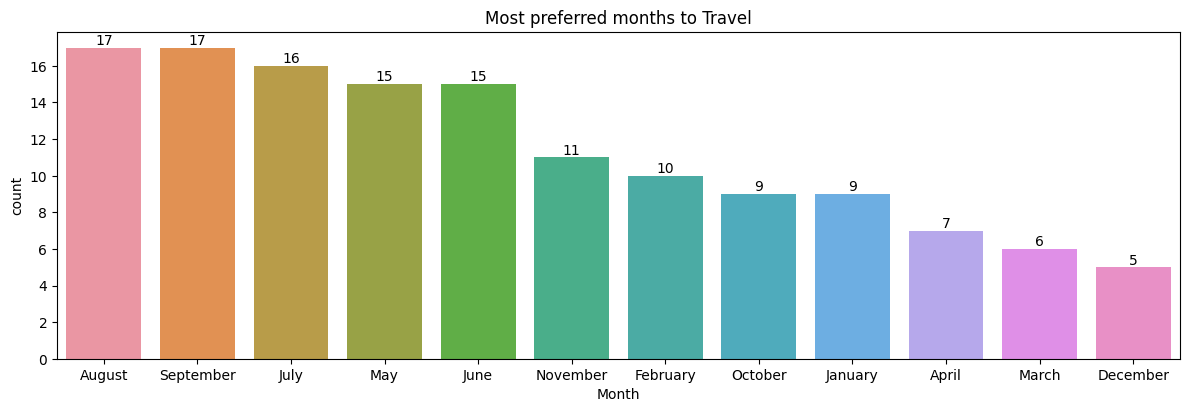

In [52]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x=df['Month'],
                   order=df['Month'].value_counts(ascending=False).index);

abs_values = df['Month'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.tight_layout()
plt.title('Most preferred months to Travel')

Text(0.5, 1.0, 'Most preferred months to Travel')

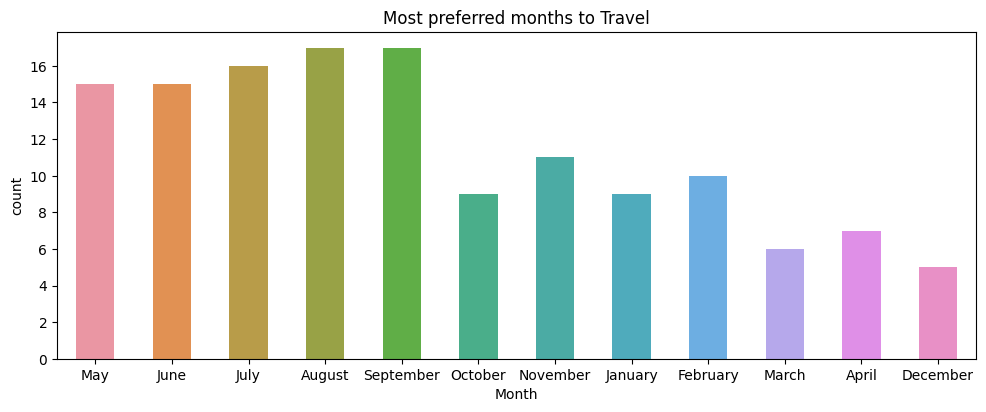

In [53]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='Month',width=0.5)
plt.tight_layout()
plt.title('Most preferred months to Travel')

### Most spent amount on transportation by gender

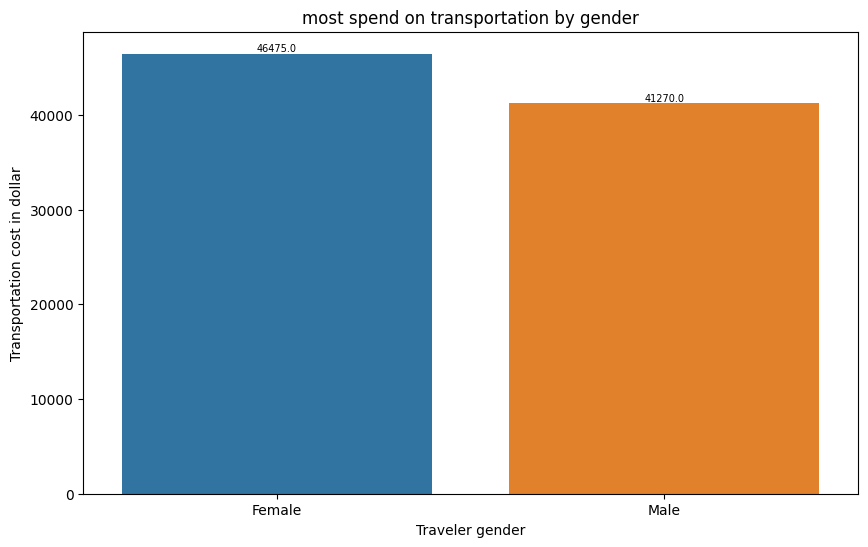

In [54]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler gender')['Transportation cost in dollar'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Traveler gender', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=0)
plt.title('most spend on transportation by gender')
plt.show()

### Average age of the traveler by their nationality

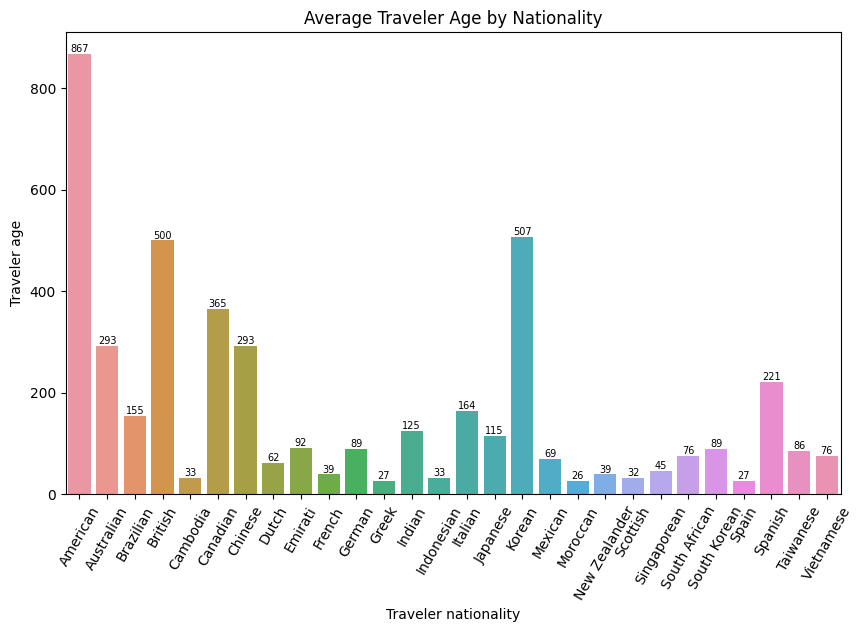

In [55]:
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler nationality')['Traveler age'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Traveler nationality', y='Traveler age')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Average Traveler Age by Nationality')
plt.show()

### Spending on transportation by nationality

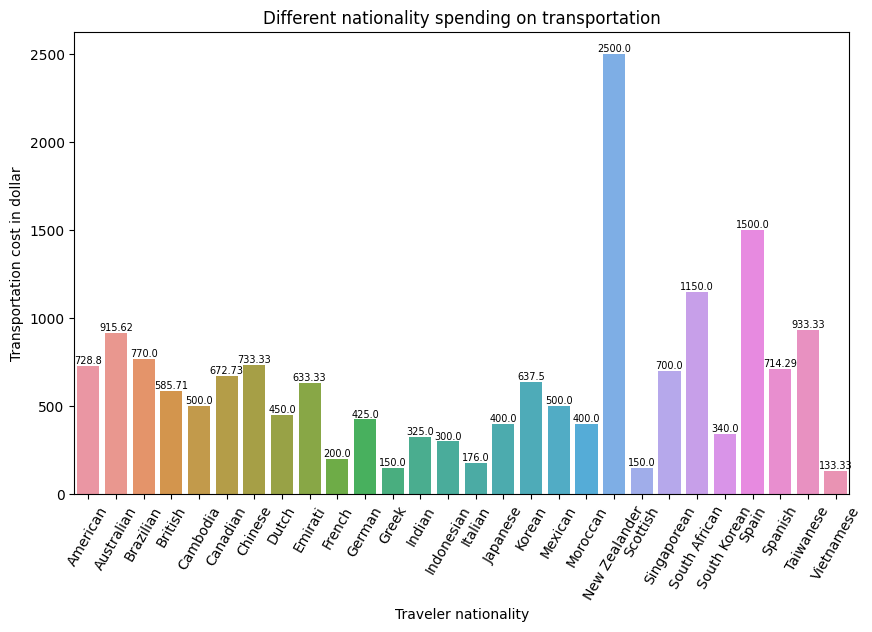

In [56]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler nationality')['Transportation cost in dollar'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Traveler nationality', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Different nationality spending on transportation')
plt.show()

### Spending on accommodation by different nationality

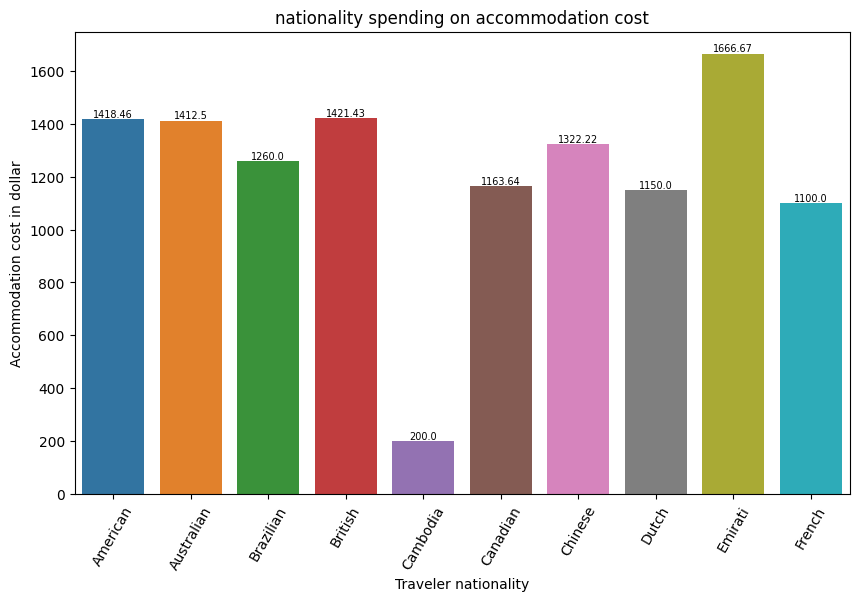

In [57]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Traveler nationality')['Accommodation cost in dollar'].mean().reset_index()[:10]
g = sns.barplot(data=avg_age, x='Traveler nationality', y='Accommodation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('nationality spending on accommodation cost')
plt.show()

### Spending on transportation type

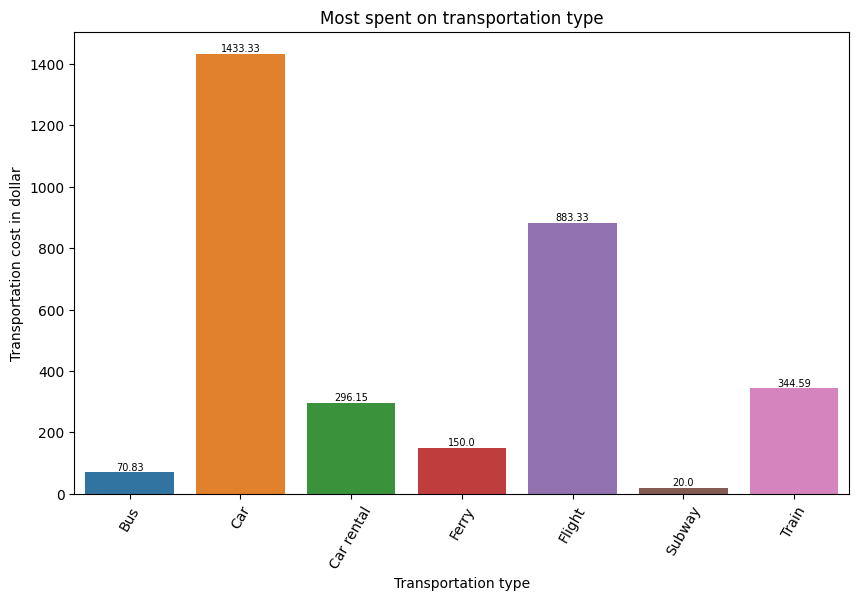

In [58]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Transportation type')['Transportation cost in dollar'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Transportation type', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Most spent on transportation type')
plt.show()

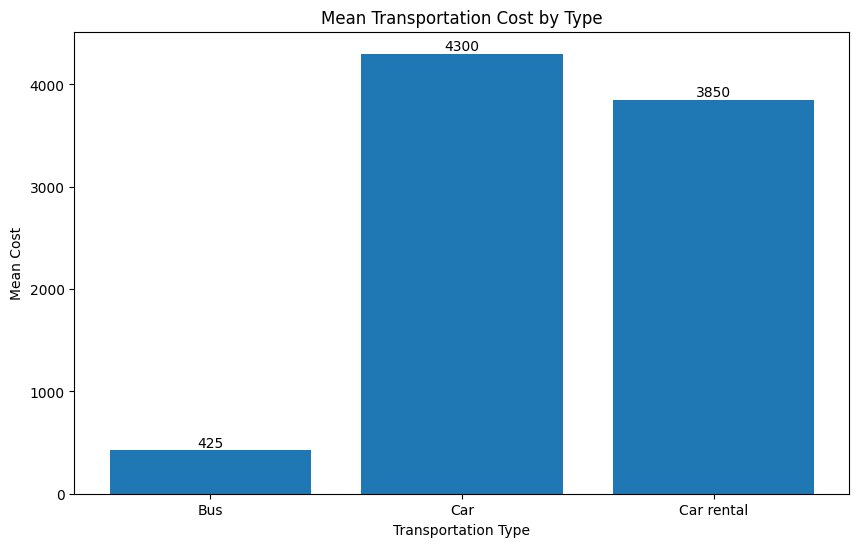

In [59]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
means = df.groupby('Transportation type')['Transportation cost in dollar'].sum().head(3)
accommodation_types = means.index
mean_costs = means.values
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(accommodation_types, mean_costs)
ax.set_xlabel('Transportation Type')
ax.set_ylabel('Mean Cost')
plt.title('Mean Transportation Cost by Type')
for container in ax.containers:
    ax.bar_label(container)

### Spending on Accommodation type

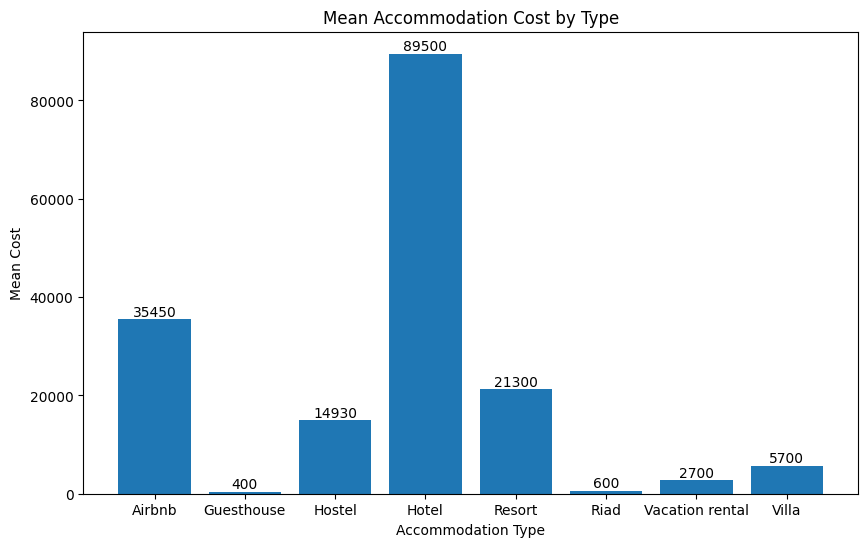

In [60]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
means = df.groupby('Accommodation type')['Accommodation cost in dollar'].sum()
accommodation_types = means.index
mean_costs = means.values
fig, ax = plt.subplots(figsize=(10, 6))

plt.bar(accommodation_types, mean_costs)
ax.set_xlabel('Accommodation Type')
ax.set_ylabel('Mean Cost')
ax.set_title('Mean Accommodation Cost by Type')
for container in ax.containers:
    ax.bar_label(container)

### Different nationality preferring accommodation type

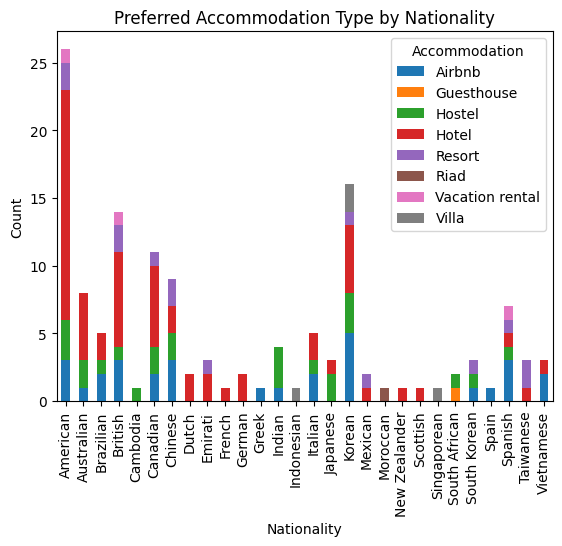

In [61]:
grouped_data = df.groupby(['Traveler nationality', 'Accommodation type']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Preferred Accommodation Type by Nationality')
plt.legend(title='Accommodation')
plt.show()

### Different nationality prefering transportation type

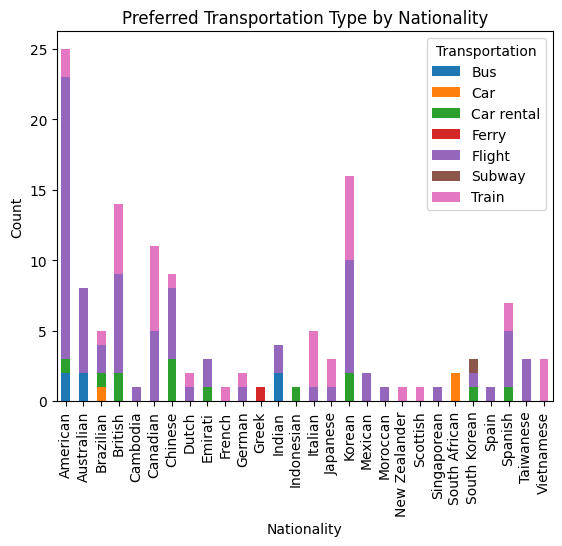

In [62]:
grouped_data = df.groupby(['Traveler nationality', 'Transportation type']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Preferred Transportation Type by Nationality')
plt.legend(title='Transportation')
plt.show()

### Accommodation cost paid by gender

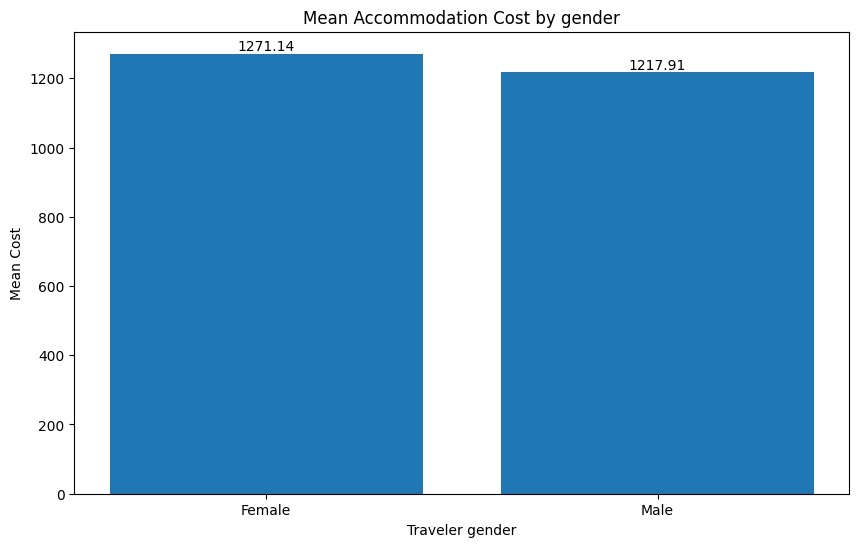

In [63]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
means = df.groupby('Traveler gender')['Accommodation cost in dollar'].mean()
accommodation_types = means.index
mean_costs = means.values
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(accommodation_types, mean_costs)
ax.set_xlabel('Traveler gender')
ax.set_ylabel('Mean Cost')
ax.set_title('Mean Accommodation Cost by gender')
for container in ax.containers:
    ax.bar_label(container)

### Spending on transportation and accommodation by respective gender

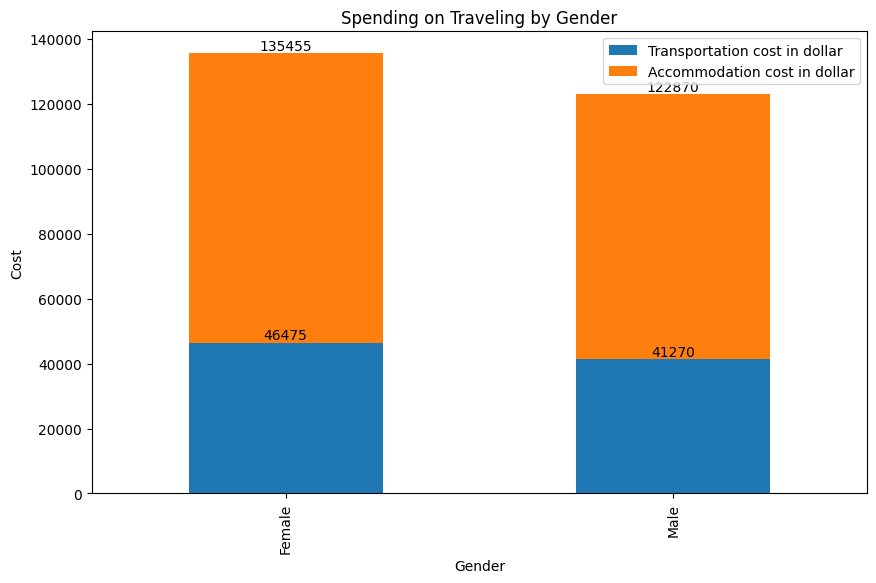

In [64]:

cost_data = df[['Transportation cost in dollar', 'Accommodation cost in dollar', 'Traveler gender']]
grouped_data = cost_data.groupby('Traveler gender').sum()
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Cost')
ax.set_title('Spending on Traveling by Gender')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

trips by months

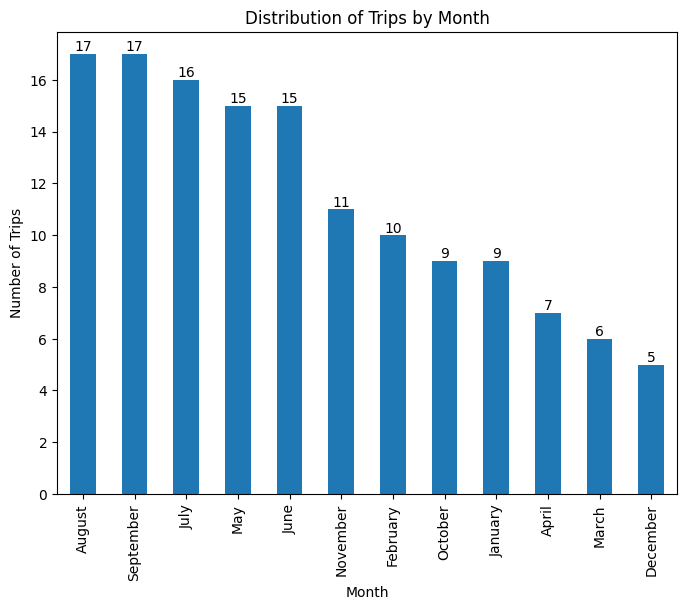

In [65]:
trips_by_month = df['Month'].value_counts().sort_values(ascending=False)
fig,ax=plt.subplots(figsize=(8, 6))
trips_by_month.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Trips')
ax.set_title('Distribution of Trips by Month')
for container in ax.containers:
    ax.bar_label(container)

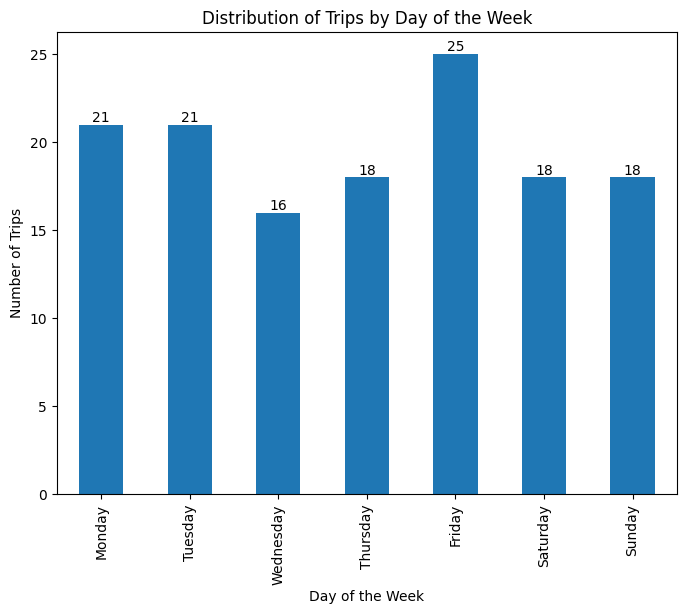

In [66]:
trips_by_day = df['Day of the week'].value_counts().sort_values(ascending=False).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig,ax = plt.subplots(figsize=(8, 6))
trips_by_day.plot(kind='bar')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Trips')
ax.set_title('Distribution of Trips by Day of the Week')
for container in ax.containers:
    ax.bar_label(container)


### Accommodation type with respect to gender

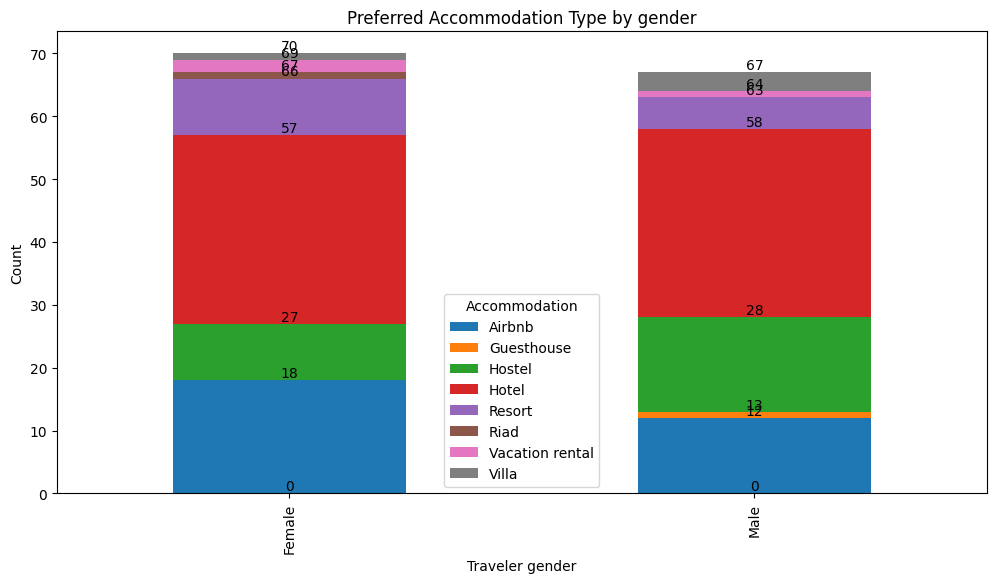

In [67]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Traveler gender', 'Accommodation type']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Traveler gender')
ax.set_ylabel('Count')
ax.set_title('Preferred Accommodation Type by gender')
ax.legend(title='Accommodation')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)


### Prefered transportation type by gender

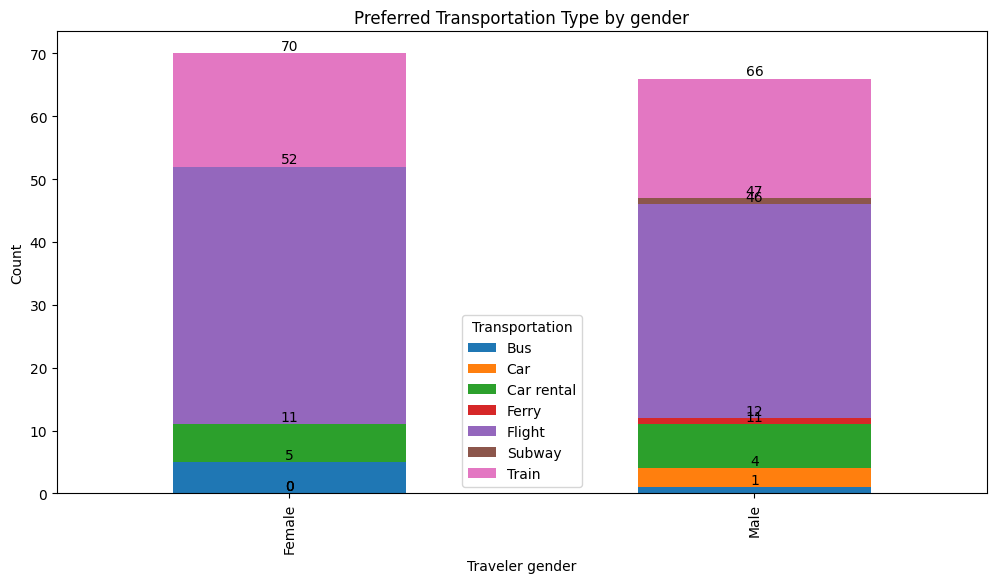

In [68]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Traveler gender', 'Transportation type']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Traveler gender')
ax.set_ylabel('Count')
ax.set_title('Preferred Transportation Type by gender')
ax.legend(title='Transportation')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

### Preferred country by gender

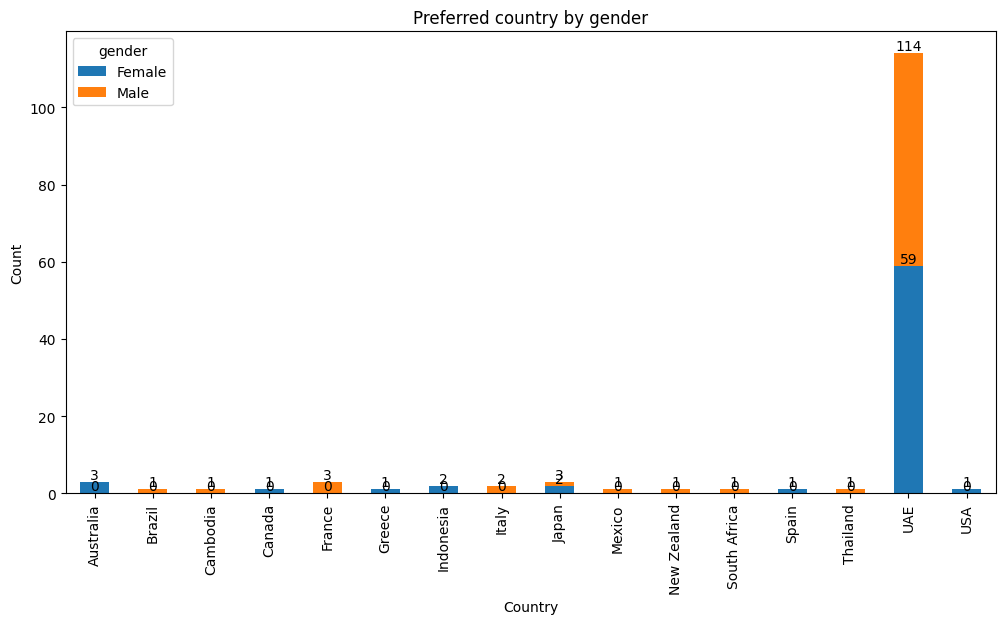

In [69]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Country','Traveler gender']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred country by gender')
ax.legend(title='gender')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

### Prefered city by gender

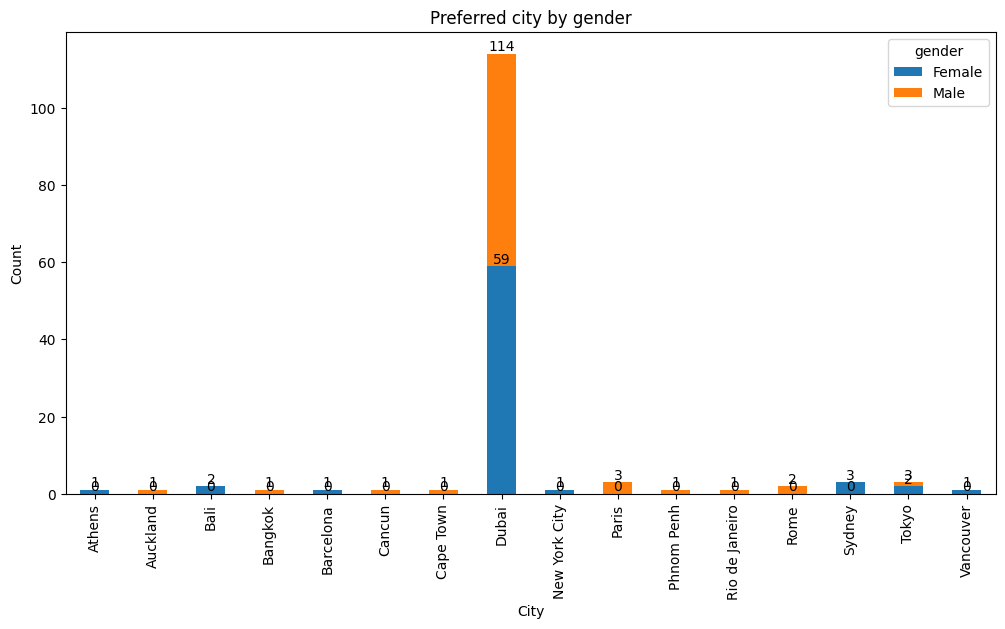

In [70]:
fig, ax = plt.subplots(figsize=(12, 6))
df['City'] = df['City'].astype(str)

grouped_data = df.groupby(['City', 'Traveler gender']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Preferred city by gender')
ax.legend(title='gender')

for container in ax.containers:
    ax.bar_label(container)

plt.show()


### Prefered transportation type with respective country

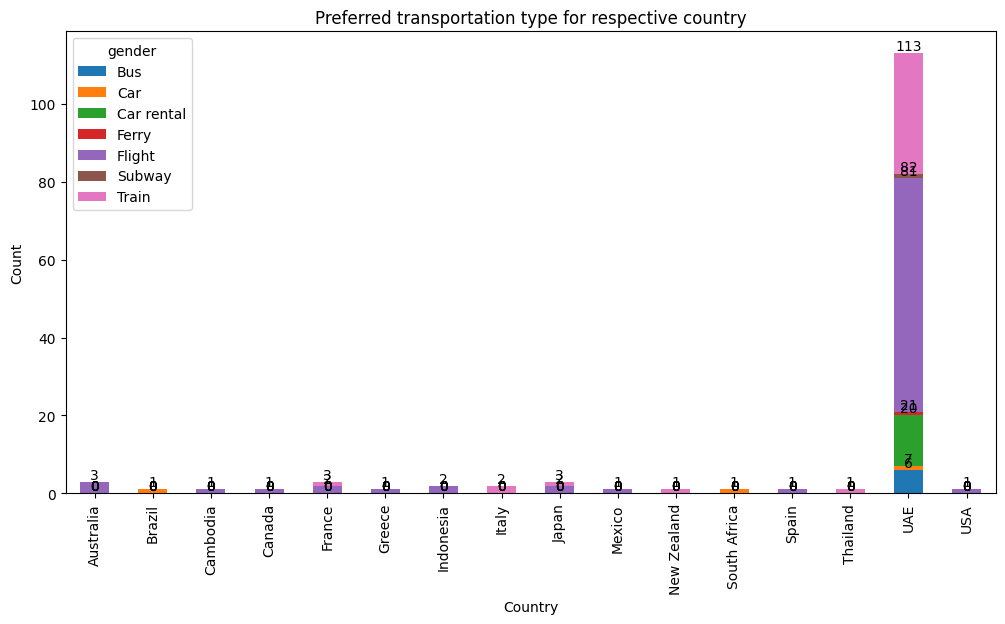

In [71]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Country','Transportation type']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred transportation type for respective country')
ax.legend(title='gender')

for container in ax.containers:
    ax.bar_label(container)

### Prefered accommodation type with respective country

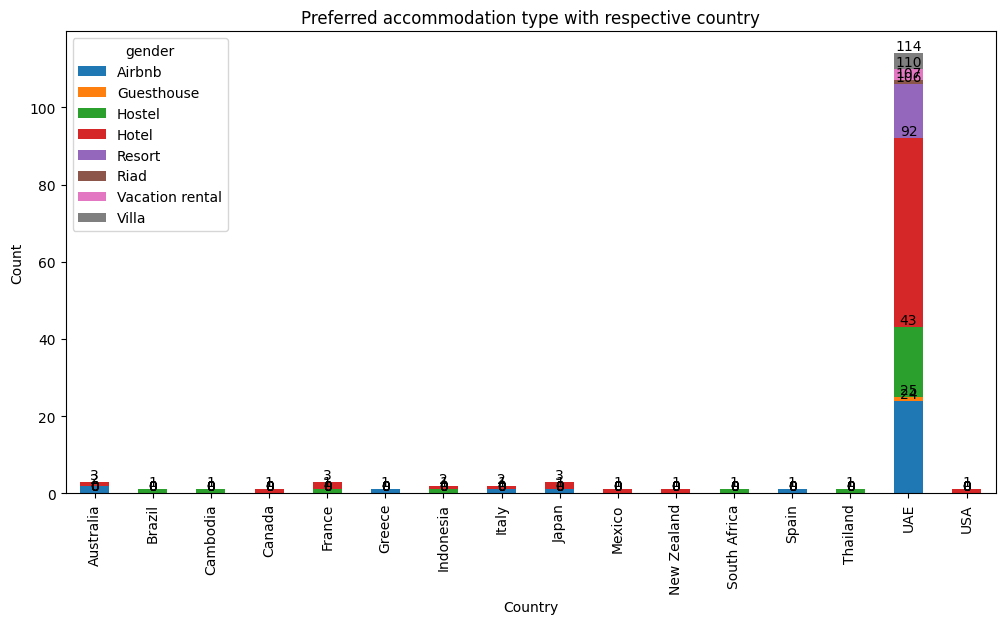

In [72]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Country','Accommodation type']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred accommodation type with respective country')
ax.legend(title='gender')

for container in ax.containers:
    ax.bar_label(container)

### Preferred accommodation type by gender with respective country

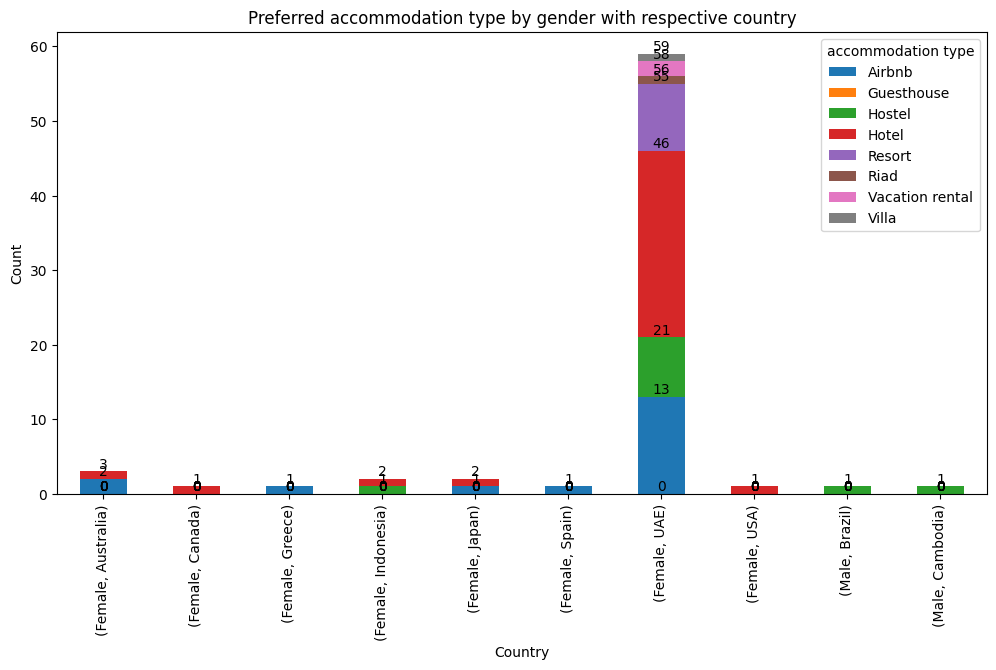

In [73]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Traveler gender','Country','Accommodation type']).size().unstack()[:10]

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred accommodation type by gender with respective country')
ax.legend(title='accommodation type')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

### Preferred transportation type by gender with respect to country

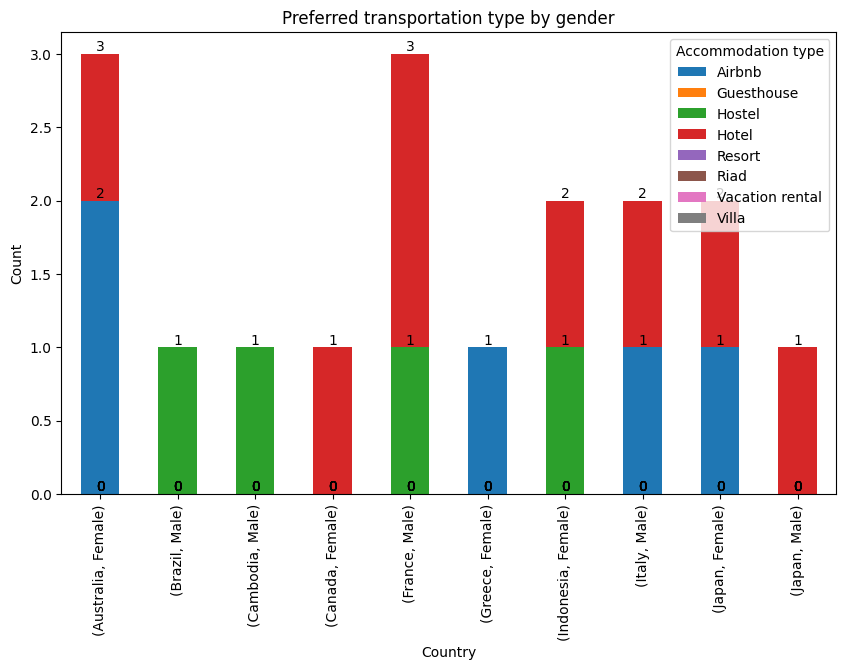

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data = df.groupby(['Country',  'Traveler gender', 'Accommodation type']).size().unstack()[:10]

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred transportation type by gender')
ax.legend(title='Accommodation type')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

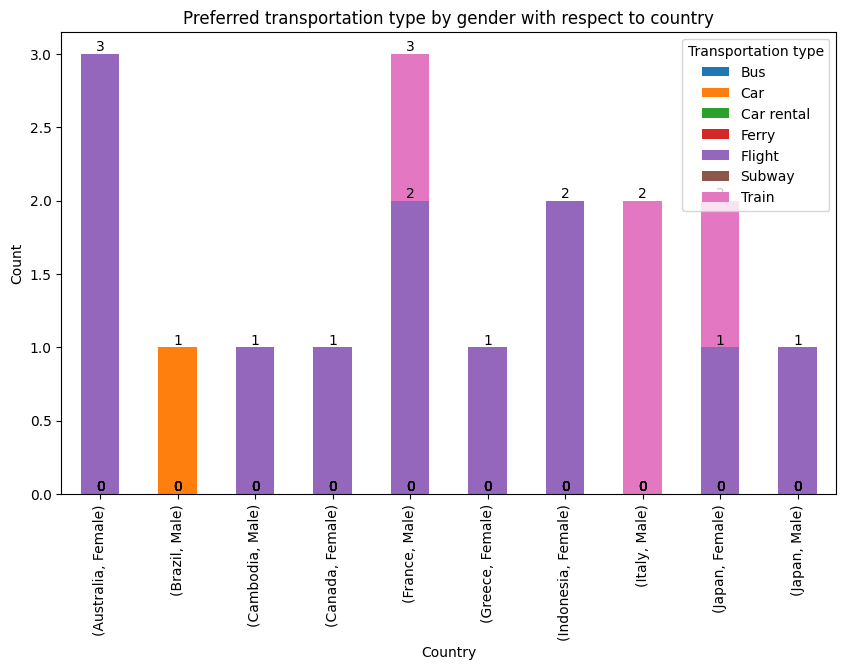

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data = df.groupby(['Country',  'Traveler gender', 'Transportation type']).size().unstack()[:10]

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred transportation type by gender with respect to country')
ax.legend(title='Transportation type')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

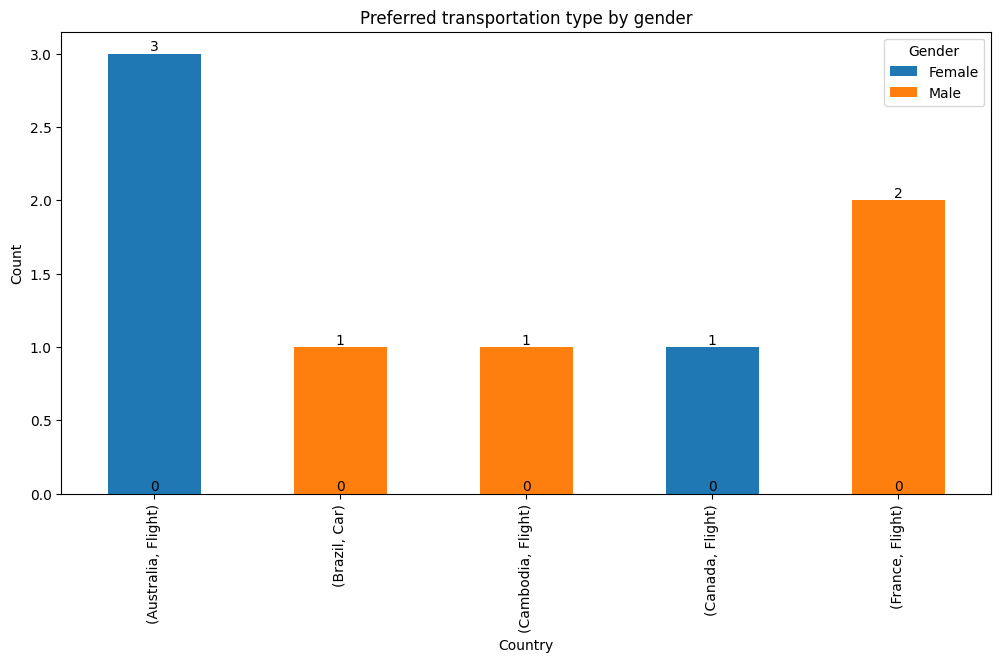

In [76]:
fig, ax = plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Country', 'Traveler gender', 'Transportation type']).size().unstack(level=1)[:5]

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Preferred transportation type by gender')
ax.legend(title='Gender')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

### Mean Transportation Cost by Country

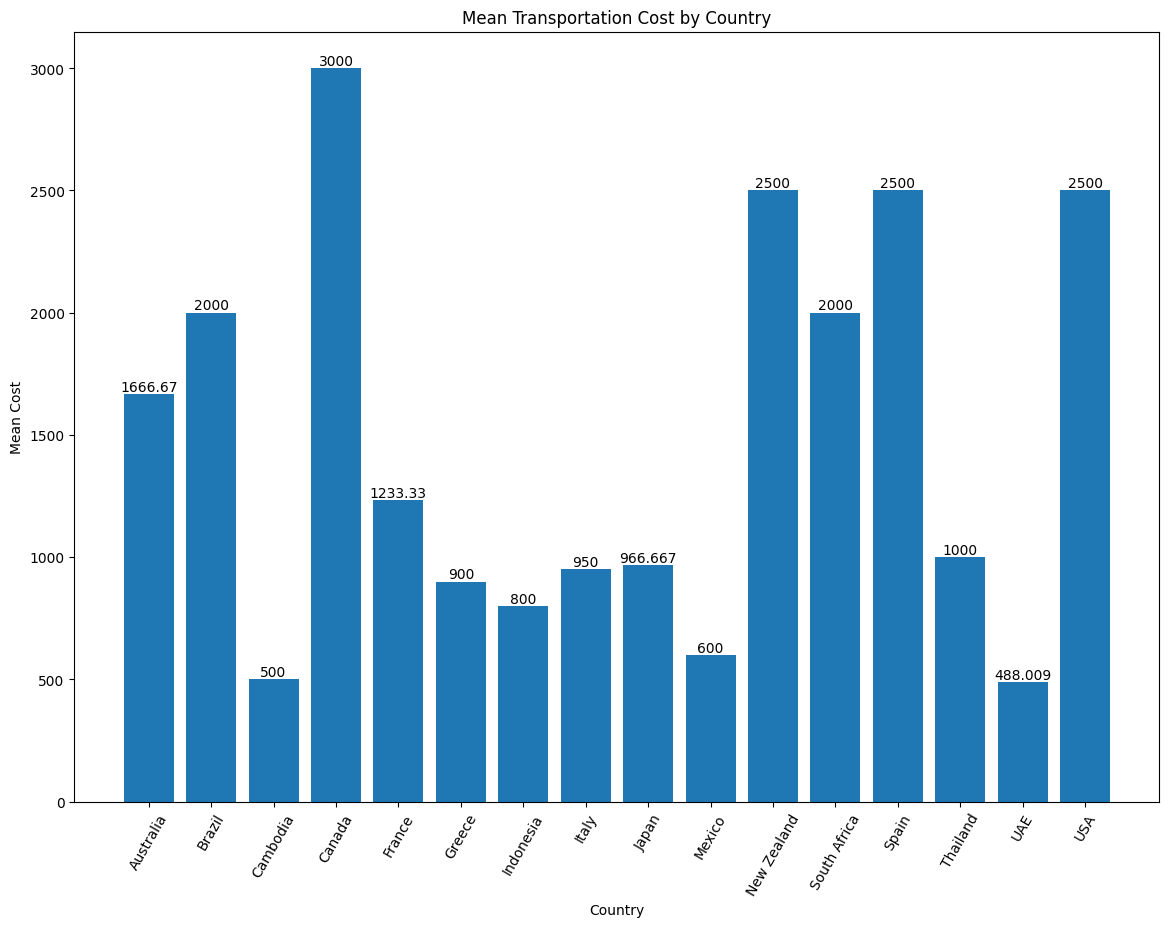

In [77]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
means = df.groupby('Country')['Transportation cost in dollar'].mean()
accommodation_types = means.index
mean_costs = means.values
fig, ax = plt.subplots(figsize=(14, 10))
plt.bar(accommodation_types, mean_costs)
ax.set_xlabel('Country')
ax.set_ylabel('Mean Cost')
plt.title('Mean Transportation Cost by Country')
plt.xticks(rotation=60)
for container in ax.containers:
    ax.bar_label(container)

### Mean Accommodation Cost by country

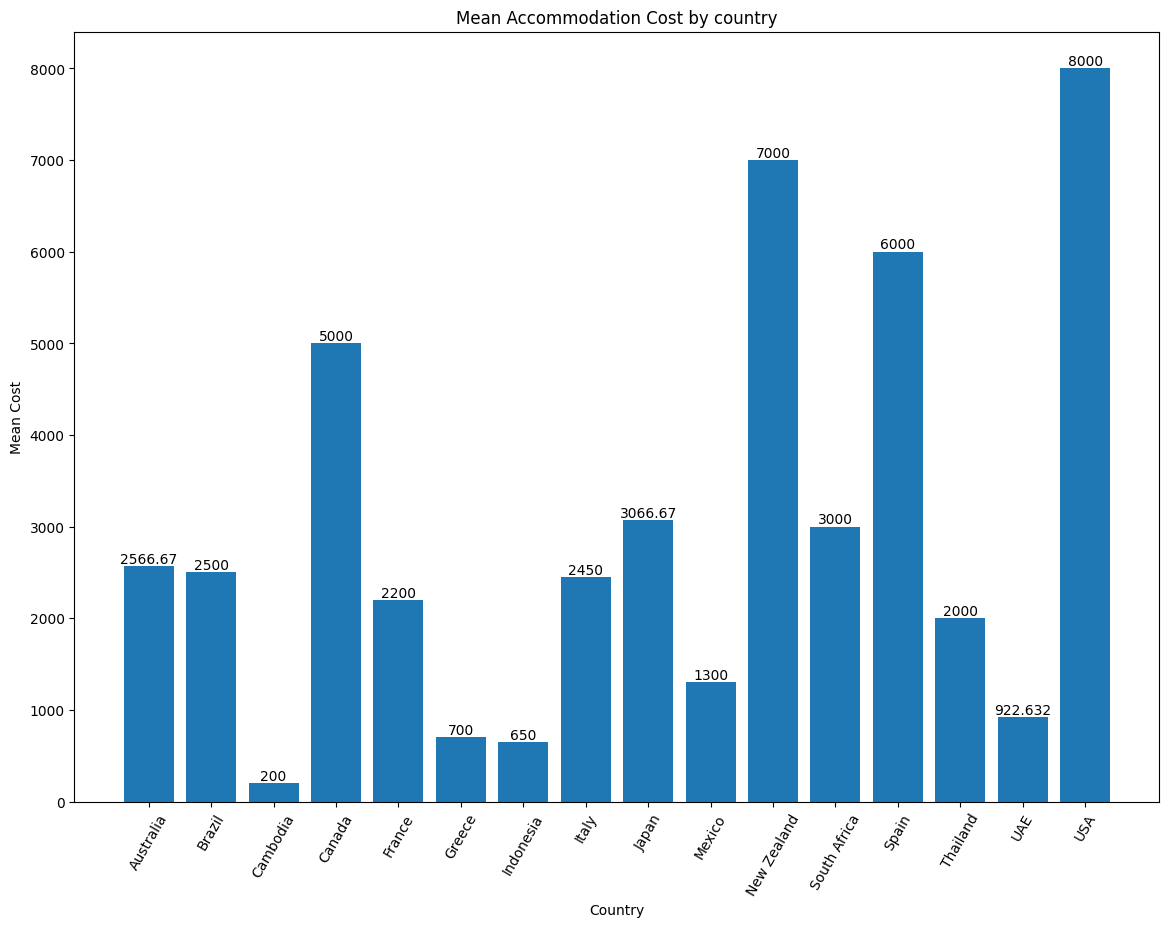

In [78]:
df['Accommodation cost in dollar'] = pd.to_numeric(df['Accommodation cost in dollar'], errors='coerce')
means = df.groupby('Country')['Accommodation cost in dollar'].mean()
accommodation_types = means.index
mean_costs = means.values
fig, ax = plt.subplots(figsize=(14, 10))
plt.bar(accommodation_types, mean_costs)
ax.set_xlabel('Country')
ax.set_ylabel('Mean Cost')
plt.title('Mean Accommodation Cost by country')
plt.xticks(rotation=60)
for container in ax.containers:
    ax.bar_label(container)

### spending on transportation cost with respective country

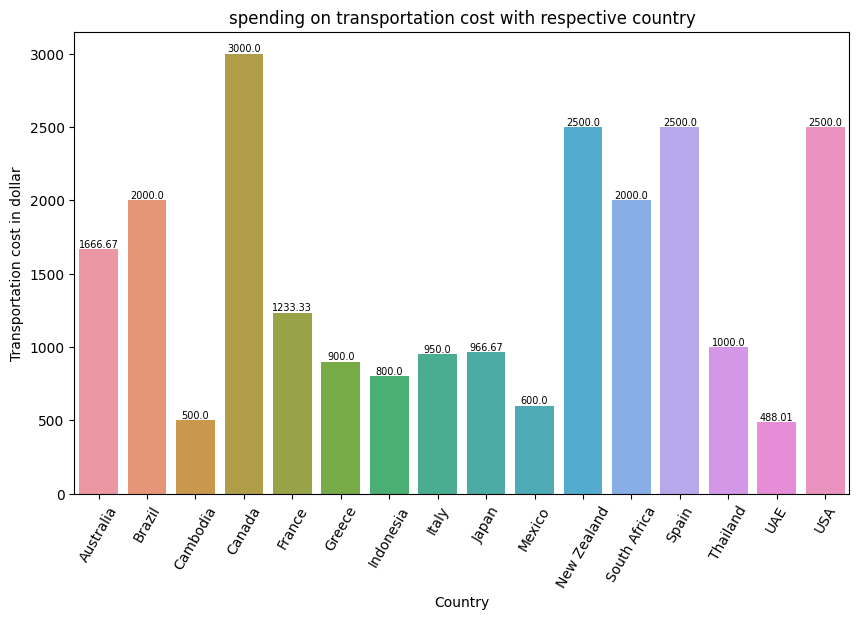

In [79]:
df['Transportation cost in dollar'] = pd.to_numeric(df['Transportation cost in dollar'], errors='coerce')
plt.figure(figsize=(10,6))
avg_age = df.groupby('Country')['Transportation cost in dollar'].mean().reset_index()
g = sns.barplot(data=avg_age, x='Country', y='Transportation cost in dollar')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('spending on transportation cost with respective country')
plt.show()

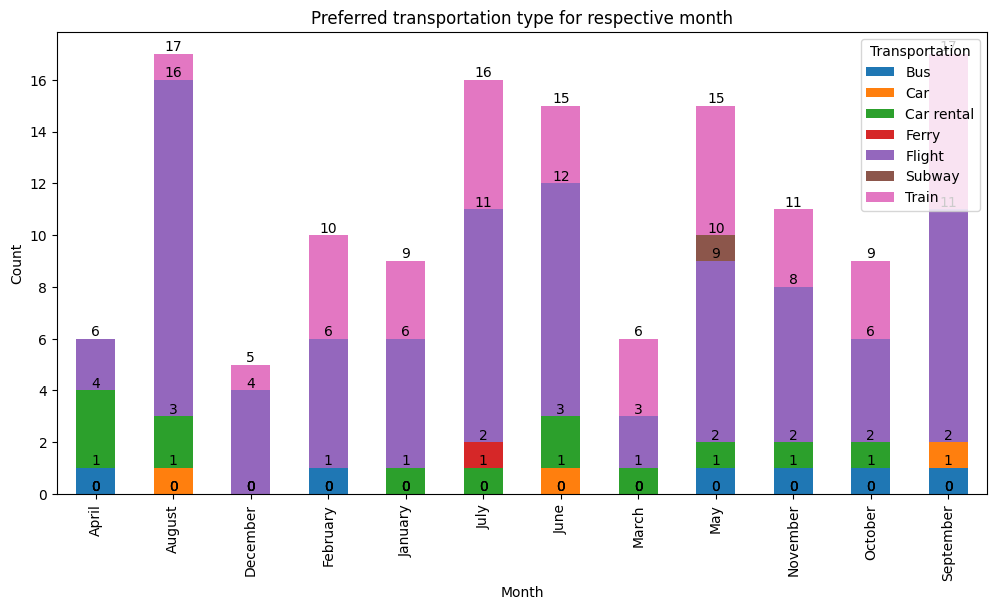

In [80]:
fig, ax=plt.subplots(figsize=(12, 6))

grouped_data = df.groupby(['Month','Transportation type']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Preferred transportation type for respective month')
ax.legend(title='Transportation')

for container in ax.containers:
    ax.bar_label(container)